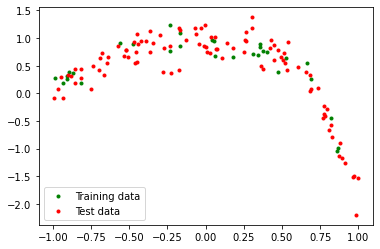

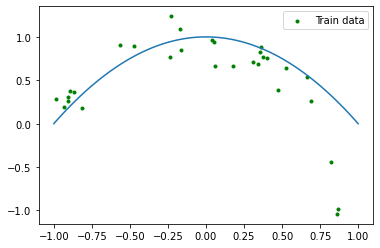

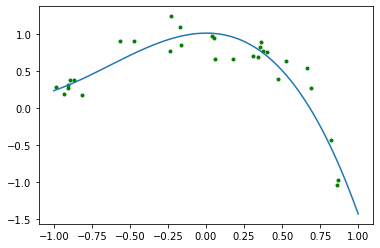

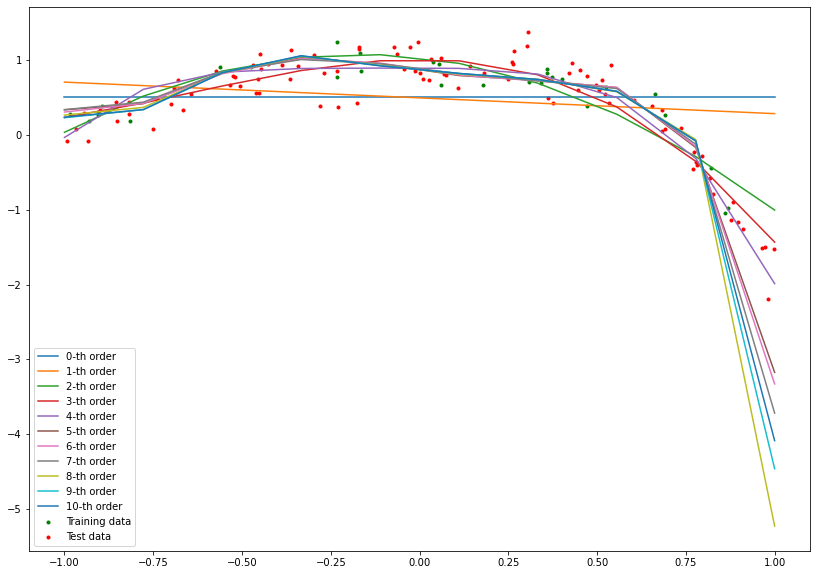

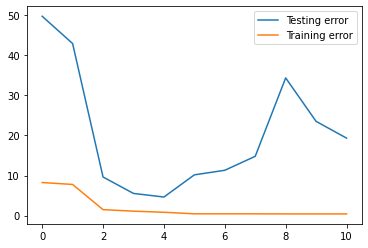

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# Read the data and split into train and test
with open('data_pol_fit.pkl', 'rb') as handle:
    data = pickle.load(handle)

x_train = data['x_train'].T
x_test = data['x_test'].T
y_train = data['y_train'].T
y_test = data['y_test'].T

# Plot the data
fig, ax = plt.subplots()
ax.scatter(x_train, y_train, c='g', marker='.', label="Training data")
ax.scatter(x_test, y_test, c='r', marker='.', label="Test data")
ax.legend()
plt.show()

# Define a function to take the value of a variable x and transform it to the k-th order polynomial f(x)
# There exists a pre-defined function np.polyval that does the exact same thing, however for the purposes of this 
# exercise, we will implement it manually. 
def poly(x, weight):
    y = 0
    k = len(weight)
    for i in range(k):
        y = y + weight[i] * (x**i)
    return y

# Visualize the function to check if it is correct.
w = [1, 0, -1,]
x = np.linspace(-1.0, 1.0, num=100, endpoint=True)
y = poly(x, w)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.scatter(x_train, y_train, c='g', marker='.', label="Train data")
ax.legend()
plt.show()

# Define an embedding function that takes a vector  𝐱 ∈ ℝ^D  to a  𝐷×𝐾+1 -dimensional space, where:
# F(x) = [ 1 x x^2 ... x^K]
def embedding_func(x, K):
    D = len(x)
    F = np.zeros((D, K+1))
    for j in range (K+1):
            F[:, j] = x ** j
    return F

# Define a function that employs least-square minimization to return the optimum value of w (weight vector)
def estimate_w(y, x, K):
    F = embedding_func (np.concatenate(x), K)
    B = np.linalg.solve (F.T @ F, F.T)
    w = B @ y
    return w

w = estimate_w(y_train, x_train, 3)
x = np.linspace(-1.0, 1.0, num=100, endpoint=True)
y = poly(x, w)
fig, ax = plt.subplots()
ax.plot(x,y)
ax.scatter(x_train, y_train, c='g', marker='.', label="Train data")
plt.show()

# Fit 0-th to 10-th order polynomials to training data and plot resulting functions
K_max = 10
weights = []

x = np.linspace(-1.0, 1.0, num=10, endpoint=True)

fig, ax = plt.subplots(figsize=(14, 10))
ax.scatter(x_train, y_train, c='g', marker='.', label="Training data")
ax.scatter(x_test, y_test, c='r', marker='.', label="Test data")

for K in range(K_max+1):
    weights.append(estimate_w(y_train, x_train, K))
    y = poly(x, weights[K])
    plt.plot(x,y, label = f"{K}-th order")
ax.legend()
plt.show()

# Compute train and test error
error_train = np.zeros(K_max+1)
error_test = np.zeros(K_max+1)

for poly_degree in range(K_max+1):
    error_train[poly_degree] = (np.linalg.norm(y_train - poly(x_train, weights[poly_degree]))) ** 2
    error_test[poly_degree] = (np.linalg.norm(y_test - poly(x_test, weights[poly_degree]))) ** 2
    
fig, ax = plt.subplots()
ax.plot(error_test, label="Testing error")
ax.plot(error_train, label="Training error")
ax.legend()
plt.show()

# We observe that as the polynomial degree increases more and more, the approximation overfits to the training data
# and as a result, the testing error increases. 

In [ ]:
## Compare linear and logistic regression

In [ ]:
def evaluate_linear_discriminant_on_grid(w_linear, loc_x, loc_y):
    grid_x, grid_y = np.meshgrid(loc_x, loc_y)
    sz_m, sz_n = grid_x.shape
    res = w_linear[0]*grid_x + w_linear[1]*grid_y + w_linear[2]

    return res, grid_x, grid_y

# Load the data
with open('data_lin_vs_log.pkl', 'rb') as handle:
    data= pickle.load(handle)

test_features = data['test_features']
test_labels = data['test_labels']
train_features = data['train_features']
train_labels = data['train_labels']

# Display the data
pos = np.nonzero(train_labels==1)[1]
neg = np.nonzero(train_labels!=1)[1]

fig, ax = plt.subplots()
ax.scatter(train_features[0, pos], train_features[1,pos], c="r", label="Positive class")
ax.scatter(train_features[0, neg], train_features[1,neg], c="b", label="Negative class")
ax.legend(loc=1)
plt.show()

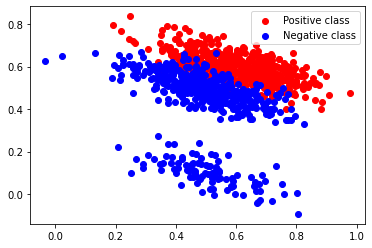

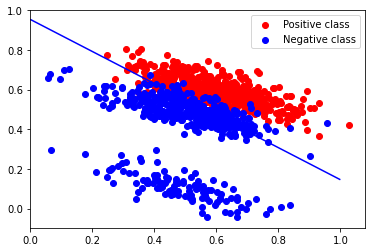

In [2]:
# Train a linear classifier
X = train_features.T
Y = train_labels.T

XX = np.dot(X.T, X)
YX = np.dot(X.T, Y)
w = np.linalg.solve(XX, YX)

# visualize classifier
fig, ax = plt.subplots()
loc_x = np.arange(0, 1.01, .01)
loc_y = np.arange(0, 1.01, .01)
function_values, grid_x, grid_y = evaluate_linear_discriminant_on_grid(w, loc_x, loc_y)
contour_values = [.5]
contPlt = ax.contour(grid_x, grid_y, function_values, contour_values, cmap=plt.cm.winter)
pos = np.nonzero(test_labels==1)[1]
neg = np.nonzero(test_labels!=1)[1]
ax.scatter(test_features[0, pos], test_features[1, pos], c="r", label="Positive class")
ax.scatter(test_features[0, neg], test_features[1, neg], c="b", label="Negative class")
ax.legend(loc=1)
plt.show()


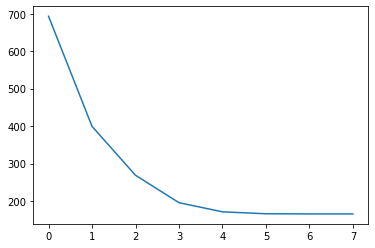

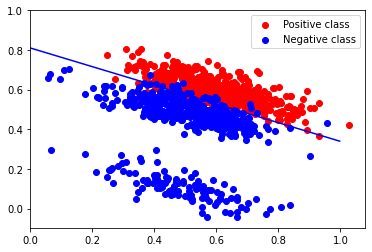

In [4]:
# Train a logistic classifier

w = np.array([[0], [0], [0]]) # Initialize w 
loss = []

while 1:
    #Initialize necessary variables:
    sz_n = len(X)
    gradient_f = np.zeros((len(w), 1))
    loss_w = 0
    R = np.zeros((sz_n, sz_n))
    g_func = np.zeros(sz_n)
    #Define g, R and L(w):
    for i in range(sz_n): 
        h_w = w.T @ X[i, :]
        g_func [i] = 1 / (1 + np.exp(-h_w))
        R[i, i] = g_func [i] * (1 - g_func[i])
        loss_w += Y[i, 0] * np.log(g_func[i]) + (1-Y[i, 0]) * np.log(1 - g_func[i])
    loss.append(-1 * loss_w)
    #Define gradient: 
    for k in range(len(w)): 
        for i in range(sz_n):
            gradient_f[k, 0] += (Y[i] - g_func[i]) * X[i, k]
        gradient_f[k] = -gradient_f[k] 
    #Calculate Hessian:
    XR = np.dot (X.T, R)
    Hessian = np.dot (XR, X)
    #Calculate change in w at this step:    
    w_past = w
    w = w - np.linalg.solve(Hessian, gradient_f)
    #Implement break condition
    if np.linalg.norm(w - w_past) < (0.001 * np.linalg.norm(w)) :
        break

# Display the loss
fig, ax = plt.subplots() 
ax.plot(loss) 
plt.show()

fig, ax = plt.subplots()
loc_x = np.arange(0, 1.01, .01)
loc_y = np.arange(0, 1.01, .01)
function_values, grid_x, grid_y = evaluate_linear_discriminant_on_grid(w, loc_x, loc_y)
contour_values = [.5]
contPlt = ax.contour(grid_x, grid_y, function_values, contour_values, cmap=plt.cm.winter)
pos = np.nonzero(test_labels==1)[1]
neg = np.nonzero(test_labels!=1)[1]

ax.scatter(test_features[0, pos], test_features[1, pos], c="r", label="Positive class")
ax.scatter(test_features[0, neg], test_features[1, neg], c="b", label="Negative class")
ax.legend(loc=1)
plt.show()